Iterating over cities:: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.05s/it]


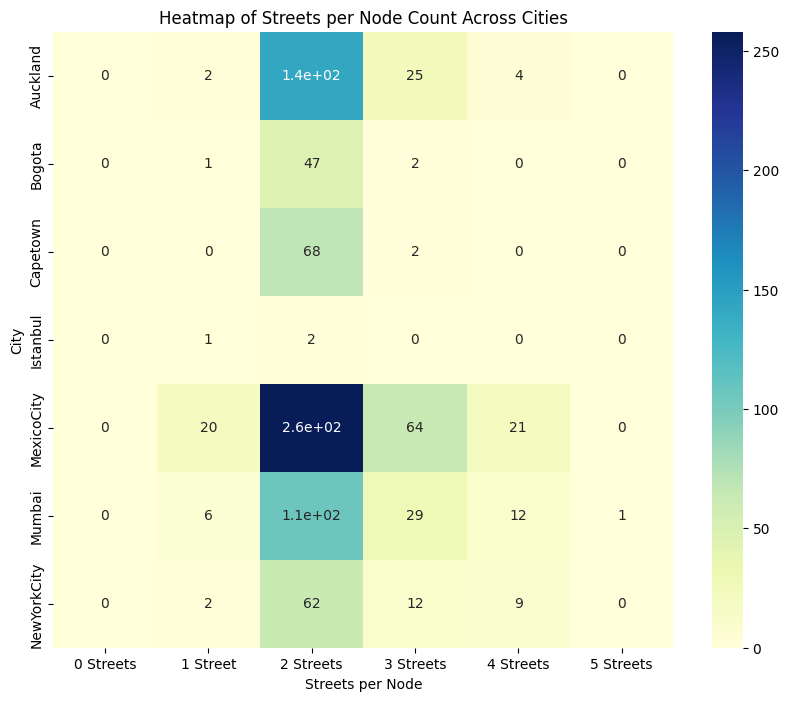

In [9]:
import osmnx as ox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Define the bounding boxes for various cities
city_bboxes = {
    # "Singapore": [1.51316, 104.135278, 1.130361, 103.566667],
    # "Zurich": [47.434666, 8.625441, 47.32022, 8.448006],
    "Mumbai": [19.270177, 72.979731, 18.893957, 72.776333],
    "Auckland": [-36.681247, 174.925937, -36.965932, 174.63532],
    "Istanbul": [41.671, 29.9581, 40.7289, 27.9714],
    "MexicoCity": [19.592757, -98.940303, 19.048237, -99.364924],
    "Bogota": [4.837015, -73.996423, 4.4604, -74.223689],
    "NewYorkCity": [40.916178, -73.700181, 40.477399, -74.25909],
    "Capetown": [-34.462, 18.1107, -33.3852, 19.0926],
    # "London": [51.28676, -0.510375, 51.691874, 0.334015]
}

def analyze_street_network(lat, lon, distance):
    # print (lat, lon, distance)
    try:
        G = ox.graph_from_point((lat, lon), dist=distance, network_type='drive', simplify=False)        
        basic_stats = ox.stats.basic_stats(G)
        # print (G)
        spn_counts = [basic_stats['streets_per_node_counts'].get(i, 0) for i in range(6)]
        return spn_counts
    except:
        # Return a list of zeros to indicate failure but maintain list structure
        return [0] * 6


# def sample_points_and_analyze(bbox, num_samples=5, distance=200):
#     lat_samples = np.linspace(bbox[0], bbox[2], num_samples)
#     lon_samples = np.linspace(bbox[1], bbox[3], num_samples)
#     results = [analyze_street_network(lat, lon, distance) for lat, lon in zip(lat_samples, lon_samples)]
#     return results

import numpy as np

def sample_points_and_analyze(bbox, num_samples=5, distance=200, seed=42):
    # Set the random seed for reproducibility
    np.random.seed(54)
    
    lat_samples = np.random.uniform(low=bbox[0], high=bbox[2], size=num_samples)
    lon_samples = np.random.uniform(low=bbox[1], high=bbox[3], size=num_samples)
    results = [analyze_street_network(lat, lon, distance) for lat, lon in zip(lat_samples, lon_samples)]
    return results



all_results = {}
for city, bbox in tqdm(city_bboxes.items(), desc="Iterating over cities:"):
    all_results[city] = sample_points_and_analyze(bbox)

# Convert results into a dataframe for heatmap plotting
data = []
for city, results in all_results.items():
    for result in results:
        data.append([city] + result)

df = pd.DataFrame(data, columns=['City', '0 Streets', '1 Street', '2 Streets', '3 Streets', '4 Streets', '5 Streets'])

# Pivot the dataframe for heatmap
heatmap_data = df.melt(id_vars=['City'], var_name='Streets per Node', value_name='Count')
heatmap_data = heatmap_data.groupby(['City', 'Streets per Node']).sum().reset_index()

# Create heatmap
plt.figure(figsize=(10, 8))
heatmap_data_pivot = heatmap_data.pivot("City", "Streets per Node", "Count")
ax = sns.heatmap(heatmap_data_pivot, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Streets per Node Count Across Cities')
plt.show()


Iterating over cities::   0%|                                                                                                                                                                                                                                                                                                                             | 0/7 [00:00<?, ?it/s]

Error: There are no data elements in the response JSON


Iterating over cities::  29%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                                            | 2/7 [00:01<00:04,  1.17it/s]

Error: Found no graph nodes within the requested polygon
Error: There are no data elements in the response JSON
Error: There are no data elements in the response JSON


Iterating over cities::  43%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                | 3/7 [00:02<00:02,  1.66it/s]

Error: There are no data elements in the response JSON
Error: Found no graph nodes within the requested polygon
Error: There are no data elements in the response JSON


Iterating over cities::  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 4/7 [00:03<00:03,  1.01s/it]

Error: Found no graph nodes within the requested polygon


Iterating over cities::  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 6/7 [00:04<00:00,  1.27it/s]

Error: There are no data elements in the response JSON
Error: There are no data elements in the response JSON


Iterating over cities:: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]

Error: There are no data elements in the response JSON
Error: There are no data elements in the response JSON


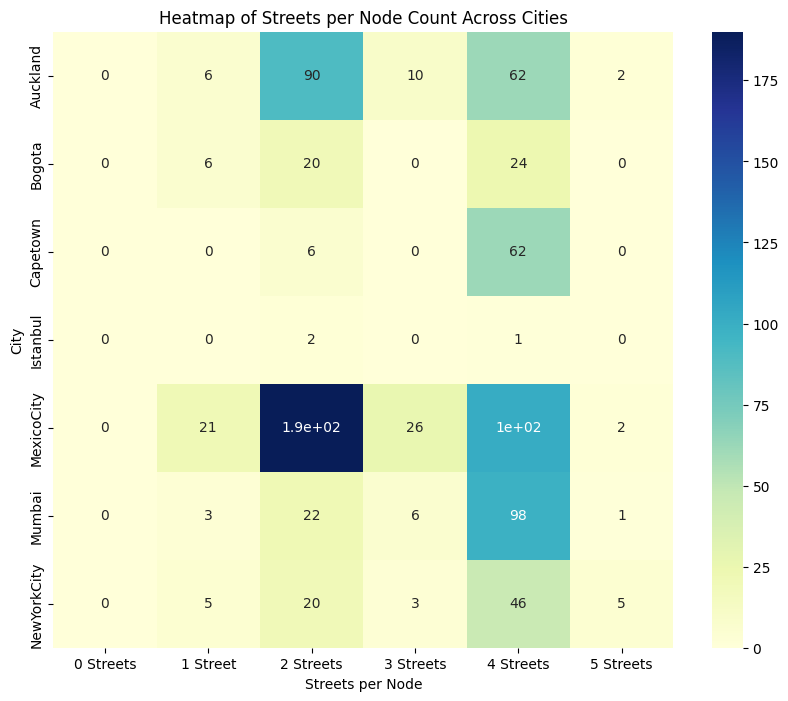

In [10]:
import osmnx as ox
import numpy as np

def analyze_street_network(lat, lon, distance):
    # print(lat, lon, distance)
    try:
        G = ox.graph_from_point((lat, lon), dist=distance, network_type='drive', simplify=False)        
        # Calculate the degree of each node
        node_degree = dict(G.degree())

        # Count occurrences of each degree value
        degree_counts = {}
        for degree in node_degree.values():
            if degree in degree_counts:
                degree_counts[degree] += 1
            else:
                degree_counts[degree] = 1

        # Create a list for the degree counts, ensuring it covers the range we expect
        max_degree = max(degree_counts.keys(), default=5)  # Prevent issues if no nodes go up to 5
        degree_distribution = [degree_counts.get(i, 0) for i in range(6)]  # Adjust range as necessary

        return degree_distribution
    except Exception as e:
        print("Error:", e)
        return [0] * 6  # Return zeros in case of failure

def sample_points_and_analyze(bbox, num_samples=5, distance=200, seed=42):
    # Set the random seed for reproducibility
    np.random.seed(54)
    
    lat_samples = np.random.uniform(low=bbox[0], high=bbox[2], size=num_samples)
    lon_samples = np.random.uniform(low=bbox[1], high=bbox[3], size=num_samples)
    results = [analyze_street_network(lat, lon, distance) for lat, lon in zip(lat_samples, lon_samples)]
    return results



all_results = {}
for city, bbox in tqdm(city_bboxes.items(), desc="Iterating over cities:"):
    all_results[city] = sample_points_and_analyze(bbox)

# Convert results into a dataframe for heatmap plotting
data = []
for city, results in all_results.items():
    for result in results:
        data.append([city] + result)

df = pd.DataFrame(data, columns=['City', '0 Streets', '1 Street', '2 Streets', '3 Streets', '4 Streets', '5 Streets'])

# Pivot the dataframe for heatmap
heatmap_data = df.melt(id_vars=['City'], var_name='Streets per Node', value_name='Count')
heatmap_data = heatmap_data.groupby(['City', 'Streets per Node']).sum().reset_index()

# Create heatmap
plt.figure(figsize=(10, 8))
heatmap_data_pivot = heatmap_data.pivot("City", "Streets per Node", "Count")
ax = sns.heatmap(heatmap_data_pivot, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Streets per Node Count Across Cities')
plt.show()

Iterating over cities:: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.25it/s]


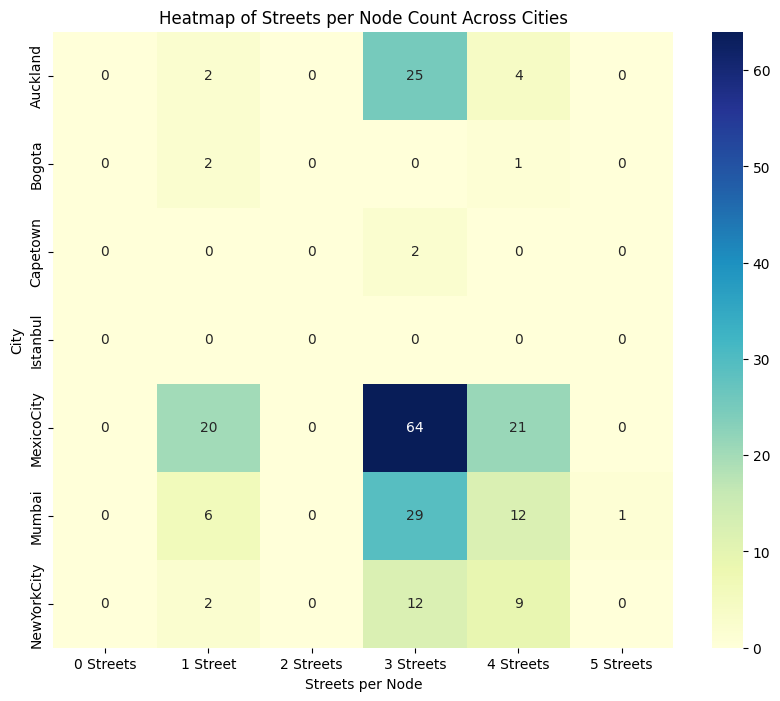

In [11]:
import osmnx as ox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Define the bounding boxes for various cities
city_bboxes = {
    # "Singapore": [1.51316, 104.135278, 1.130361, 103.566667],
    # "Zurich": [47.434666, 8.625441, 47.32022, 8.448006],
    "Mumbai": [19.270177, 72.979731, 18.893957, 72.776333],
    "Auckland": [-36.681247, 174.925937, -36.965932, 174.63532],
    "Istanbul": [41.671, 29.9581, 40.7289, 27.9714],
    "MexicoCity": [19.592757, -98.940303, 19.048237, -99.364924],
    "Bogota": [4.837015, -73.996423, 4.4604, -74.223689],
    "NewYorkCity": [40.916178, -73.700181, 40.477399, -74.25909],
    "Capetown": [-34.462, 18.1107, -33.3852, 19.0926],
    # "London": [51.28676, -0.510375, 51.691874, 0.334015]
}

def analyze_street_network(lat, lon, distance):
    # print (lat, lon, distance)
    try:
        G = ox.graph_from_point((lat, lon), dist=distance, network_type='drive', simplify=True)        
        basic_stats = ox.stats.basic_stats(G)
        # print (G)
        spn_counts = [basic_stats['streets_per_node_counts'].get(i, 0) for i in range(6)]
        return spn_counts
    except:
        # Return a list of zeros to indicate failure but maintain list structure
        return [0] * 6


# def sample_points_and_analyze(bbox, num_samples=5, distance=200):
#     lat_samples = np.linspace(bbox[0], bbox[2], num_samples)
#     lon_samples = np.linspace(bbox[1], bbox[3], num_samples)
#     results = [analyze_street_network(lat, lon, distance) for lat, lon in zip(lat_samples, lon_samples)]
#     return results

import numpy as np

def sample_points_and_analyze(bbox, num_samples=5, distance=200, seed=42):
    # Set the random seed for reproducibility
    np.random.seed(54)
    
    lat_samples = np.random.uniform(low=bbox[0], high=bbox[2], size=num_samples)
    lon_samples = np.random.uniform(low=bbox[1], high=bbox[3], size=num_samples)
    results = [analyze_street_network(lat, lon, distance) for lat, lon in zip(lat_samples, lon_samples)]
    return results



all_results = {}
for city, bbox in tqdm(city_bboxes.items(), desc="Iterating over cities:"):
    all_results[city] = sample_points_and_analyze(bbox)

# Convert results into a dataframe for heatmap plotting
data = []
for city, results in all_results.items():
    for result in results:
        data.append([city] + result)

df = pd.DataFrame(data, columns=['City', '0 Streets', '1 Street', '2 Streets', '3 Streets', '4 Streets', '5 Streets'])

# Pivot the dataframe for heatmap
heatmap_data = df.melt(id_vars=['City'], var_name='Streets per Node', value_name='Count')
heatmap_data = heatmap_data.groupby(['City', 'Streets per Node']).sum().reset_index()

# Create heatmap
plt.figure(figsize=(10, 8))
heatmap_data_pivot = heatmap_data.pivot("City", "Streets per Node", "Count")
ax = sns.heatmap(heatmap_data_pivot, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Streets per Node Count Across Cities')
plt.show()


Iterating over cities::  14%|████████████████████████████████████████████▏                                                                                                                                                                                                                                                                        | 1/7 [00:00<00:01,  5.45it/s]

19.270177 72.979731 200
Error: Found no graph nodes within the requested polygon
-36.681247 174.925937 200
Error: There are no data elements in the response JSON
41.671 29.9581 200
Error: There are no data elements in the response JSON
19.592757 -98.940303 200
MultiDiGraph with 38 nodes and 74 edges
[(2957402634, 4), (5270756531, 6), (5270756532, 6), (5270756534, 6), (5270756535, 2), (5317215046, 2), (5317215047, 2), (5317215048, 4), (5317215049, 4), (5317251435, 2), (7239728582, 4), (7239728583, 6), (7239728584, 4), (7239768485, 2), (7239768486, 6), (7239768487, 2), (7239768488, 4), (7239768498, 2), (7239768499, 4), (7239768500, 4), (7239768501, 4), (7239768502, 6), (7239768503, 2), (7239768504, 4), (7239768505, 6), (7239768506, 4), (7239768507, 4), (7239768508, 4), (7239768509, 4), (7239768510, 2), (7239768511, 6), (7239768512, 2), (7239768513, 4), (7239867518, 4), (8295617292, 4), (8295617293, 4), (8295618724, 4), (8612719826, 4)]


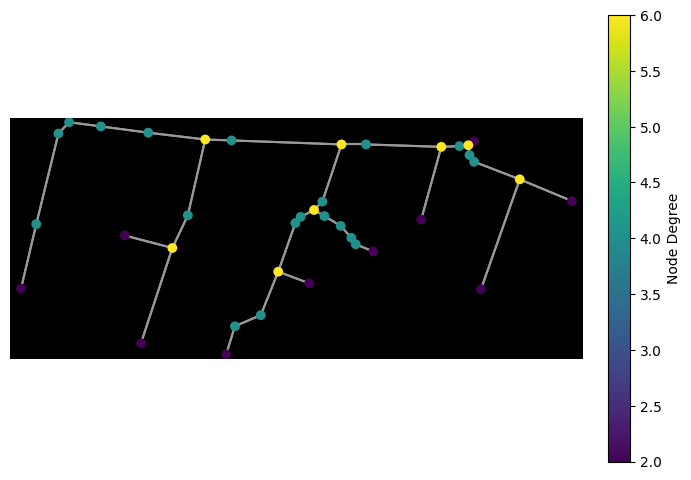

Iterating over cities::  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 4/7 [00:00<00:00,  5.35it/s]

4.837015 -73.996423 200
MultiDiGraph with 7 nodes and 12 edges
[(1381301882, 4), (1381301956, 4), (2279651716, 4), (3443289565, 2), (3443289566, 4), (3443289576, 4), (5602888500, 2)]


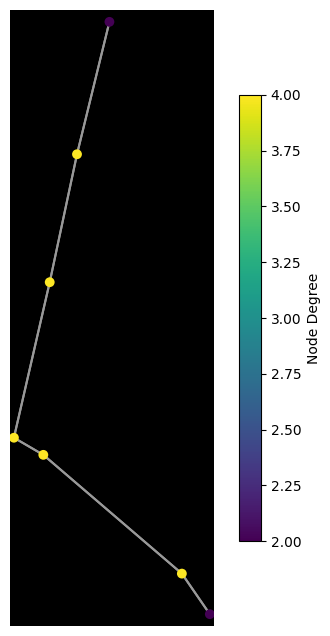

Iterating over cities:: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.30it/s]

40.916178 -73.700181 200
Error: There are no data elements in the response JSON
-34.462 18.1107 200
Error: There are no data elements in the response JSON


In [10]:
import matplotlib.cm as cm
from tqdm import tqdm

def analyze_street_network_simple(lat, lon, distance):
    print(lat, lon, distance)
    try:
        G = ox.graph_from_point((lat, lon), dist=distance, network_type='drive', simplify=False)        
        basic_stats = ox.stats.basic_stats(G)
        print(G)
        spn_counts = [basic_stats['streets_per_node_counts'].get(i, 0) for i in range(6)]
        print(G.degree())

        # Calculate node degrees and prepare for coloring
        node_degrees = dict(G.degree())
        norm = mcolors.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
        cmap = cm.viridis
        node_colors = [cmap(norm(node_degrees[node])) for node in G.nodes()]

        # Plot the graph with node colors based on degree
        ox.plot_graph(G, node_color=node_colors, node_size=50, edge_linewidth=1.5, edge_color='#999999', bgcolor='k')
        
        return spn_counts
    except Exception as e:
        print("Error:", e)
        # Return a list of zeros to indicate failure but maintain list structure
        return [0] * 6


def analyze_street_network(lat, lon, distance):
    print(lat, lon, distance)
    try:
        # Generate the graph from specified point and distance
        G = ox.graph_from_point((lat, lon), dist=distance, network_type='drive', simplify=False)        
        basic_stats = ox.stats.basic_stats(G)
        print(G)
        spn_counts = [basic_stats['streets_per_node_counts'].get(i, 0) for i in range(6)]
        print(G.degree())

        # Calculate node degrees and prepare for coloring
        node_degrees = dict(G.degree())
        norm = mcolors.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
        cmap = cm.viridis
        node_colors = [cmap(norm(node_degrees[node])) for node in G.nodes()]

        # Plot the graph with node colors based on degree
        fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=50, edge_linewidth=1.5, edge_color='#999999', bgcolor='k', show=False)

        # Create a colorbar with the colormap
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # You have to set_array for ScalarMappable
        cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.036, pad=0.04)
        cbar.set_label('Node Degree')

        plt.show()
        return spn_counts
    except Exception as e:
        print("Error:", e)
        # Return a list of zeros to indicate failure but maintain list structure
        return [0] * 6


def sample_points_and_analyze(bbox, num_samples=1, distance=200):
    lat_samples = np.linspace(bbox[0], bbox[2], num_samples)
    lon_samples = np.linspace(bbox[1], bbox[3], num_samples)
    results = [analyze_street_network(lat, lon, distance) for lat, lon in zip(lat_samples, lon_samples)]
    return results

all_results = {}
for city, bbox in tqdm(city_bboxes.items(), desc="Iterating over cities:"):
    all_results[city] = sample_points_and_analyze(bbox)




Iterating over cities::  14%|████████████████████████████████████████████▏                                                                                                                                                                                                                                                                        | 1/7 [00:00<00:00,  7.09it/s]

19.270177 72.979731 200
Error: Found no graph nodes within the requested polygon
-36.681247 174.925937 200
Error: There are no data elements in the response JSON
41.671 29.9581 200
Error: There are no data elements in the response JSON
19.592757 -98.940303 200
MultiDiGraph with 38 nodes and 74 edges


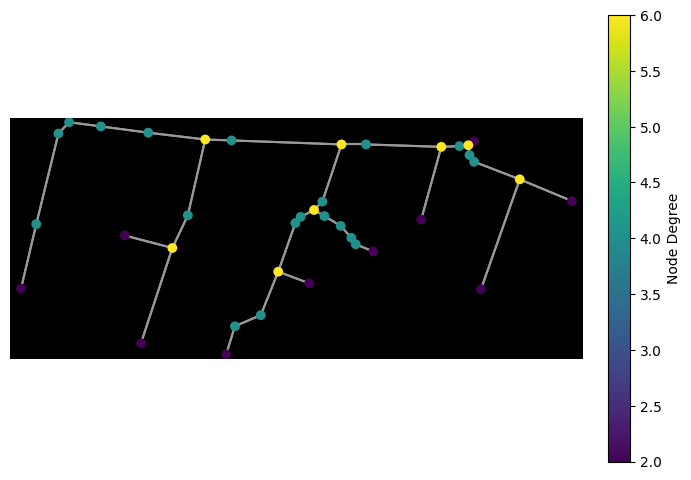

Iterating over cities::  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 4/7 [00:01<00:00,  3.32it/s]

4.837015 -73.996423 200
MultiDiGraph with 7 nodes and 12 edges


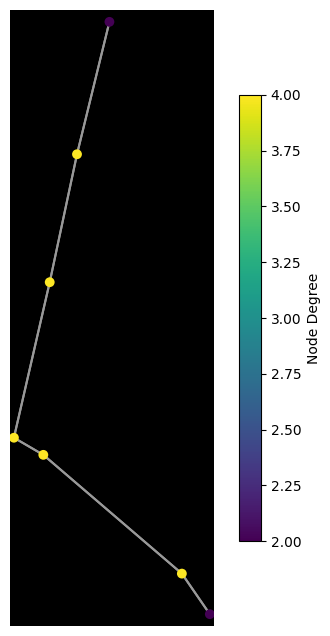

Iterating over cities:: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.40it/s]

40.916178 -73.700181 200
Error: There are no data elements in the response JSON
-34.462 18.1107 200
Error: There are no data elements in the response JSON


In [13]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from tqdm import tqdm

def analyze_street_network(lat, lon, distance):
    print(lat, lon, distance)
    try:
        G = ox.graph_from_point((lat, lon), dist=distance, network_type='drive', simplify=False)        
        basic_stats = ox.stats.basic_stats(G)
        print(G)
        spn_counts = [basic_stats['streets_per_node_counts'].get(i, 0) for i in range(6)]
        print("Streets per Node Counts for degrees 1 to 5:", spn_counts[1:6])  # Print the counts for degrees 1-5

        # Calculate node degrees and prepare for coloring
        node_degrees = dict(G.degree())
        norm = mcolors.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
        cmap = cm.viridis
        node_colors = [cmap(norm(node_degrees[node])) for node in G.nodes()]

        # Plot the graph with node colors based on degree
        fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=50, edge_linewidth=1.5, edge_color='#999999', bgcolor='k', show=False)
        # Create a colorbar with the colormap
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.036, pad=0.04)
        cbar.set_label('Node Degree')
        plt.show()
        
        return spn_counts
    except Exception as e:
        print("Error:", e)
        # Return a list of zeros to indicate failure but maintain list structure
        return [0] * 6

def analyze_street_network(lat, lon, distance):
    print(lat, lon, distance)
    try:
        # Generate the graph from specified point and distance
        G = ox.graph_from_point((lat, lon), dist=distance, network_type='drive', simplify=False)        
        basic_stats = ox.stats.basic_stats(G)
        print(G)
        spn_counts = [basic_stats['streets_per_node_counts'].get(i, 0) for i in range(6)]
        # print(G.degree())

        # Calculate node degrees and prepare for coloring
        node_degrees = dict(G.degree())
        norm = mcolors.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
        cmap = cm.viridis
        node_colors = [cmap(norm(node_degrees[node])) for node in G.nodes()]

        # Plot the graph with node colors based on degree
        fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=50, edge_linewidth=1.5, edge_color='#999999', bgcolor='k', show=False)

        # Create a colorbar with the colormap
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # You have to set_array for ScalarMappable
        cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.036, pad=0.04)
        cbar.set_label('Node Degree')

        plt.show()
        return spn_counts
    except Exception as e:
        print("Error:", e)
        # Return a list of zeros to indicate failure but maintain list structure
        return [0] * 6


def sample_points_and_analyze(bbox, num_samples=1, distance=200):
    lat_samples = np.linspace(bbox[0], bbox[2], num_samples)
    lon_samples = np.linspace(bbox[1], bbox[3], num_samples)
    results = [analyze_street_network(lat, lon, distance) for lat, lon in zip(lat_samples, lon_samples)]
    return results

all_results = {}
for city, bbox in tqdm(city_bboxes.items(), desc="Iterating over cities:"):
    all_results[city] = sample_points_and_analyze(bbox)




In [6]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from tqdm import tqdm

def analyze_street_network(lat, lon, distance):
    print(lat, lon, distance)
    try:
        # Generate the graph from specified point and distance
        G = ox.graph_from_point((lat, lon), dist=distance, network_type='drive', simplify=False)        
        basic_stats = ox.stats.basic_stats(G)
        print(G)
        spn_counts = [basic_stats['streets_per_node_counts'].get(i, 0) for i in range(6)]
        print(G.degree())

        # Calculate node degrees and prepare for coloring
        node_degrees = dict(G.degree())
        norm = mcolors.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
        cmap = cm.viridis
        node_colors = [cmap(norm(node_degrees[node])) for node in G.nodes()]

        # Plot the graph with node colors based on degree
        fig, ax = ox.plot_graph(G, node_color=node_colors, node_size=50, edge_linewidth=1.5, edge_color='#999999', bgcolor='k', show=False)

        # Create a colorbar with the colormap
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # You have to set_array for ScalarMappable
        cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.036, pad=0.04)
        cbar.set_label('Node Degree')

        plt.show()
        return spn_counts
    except Exception as e:
        print("Error:", e)
        # Return a list of zeros to indicate failure but maintain list structure
        return [0] * 6

# Additional code for sampling points and analyzing networks
# Define your city_bboxes and other code to use analyze_street_network function as needed
